# Prediction of California Housing Prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
excel_df=pd.read_excel('california_housing.xlsx')

In [3]:
excel_df.to_csv('california_housing.csv', index=False)

In [4]:
df = pd.read_csv('california_housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
df.shape

(20640, 10)

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [9]:
df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace=True)

In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [11]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [12]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

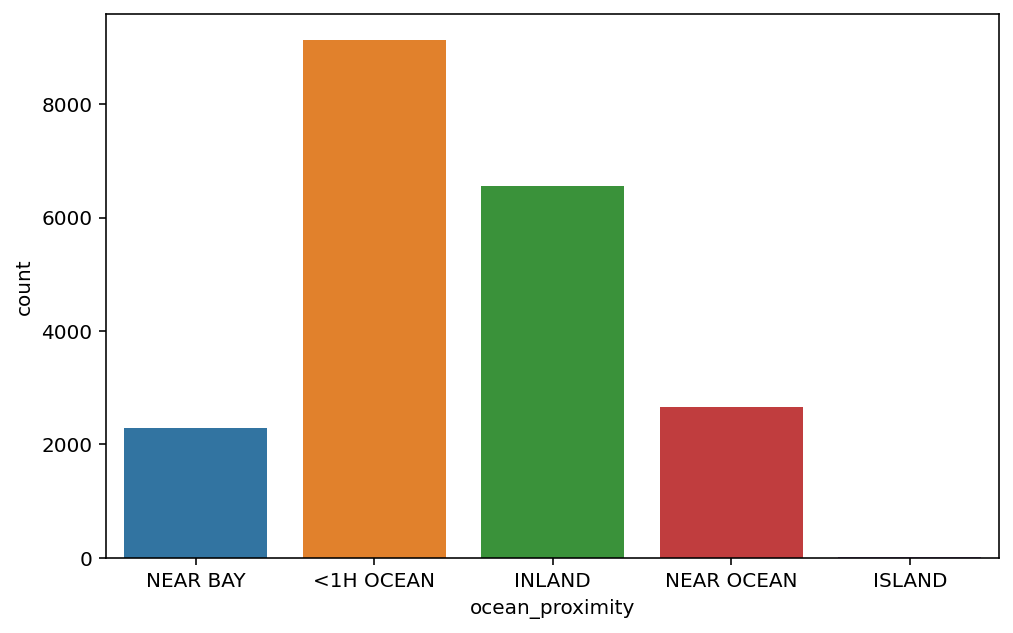

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(df.ocean_proximity)
plt.show()

In [14]:
df=pd.get_dummies(df,columns=['ocean_proximity'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  int64  
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

# Models

In [16]:
# import sklearn modules

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [17]:
x=df.drop(['median_house_value'],axis=1)
y=df.median_house_value

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [19]:
# scaling the data

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

### Linear Regression

In [22]:
lr =LinearRegression()
lr.fit(scaled_x_train, y_train)
lr_preds = lr.predict(scaled_x_test)

print('Linear Regression')
print('Root Mean Squared Error => {mse}'.format(mse=(round(mse(y_test, lr_preds,squared=False),2))))
print('Model Accuracy => {r2}'.format(r2=round(r2_score(y_test,lr_preds)*100, 2)))

Linear Regression
Root Mean Squared Error => 69155.0
Model Accuracy => 64.13


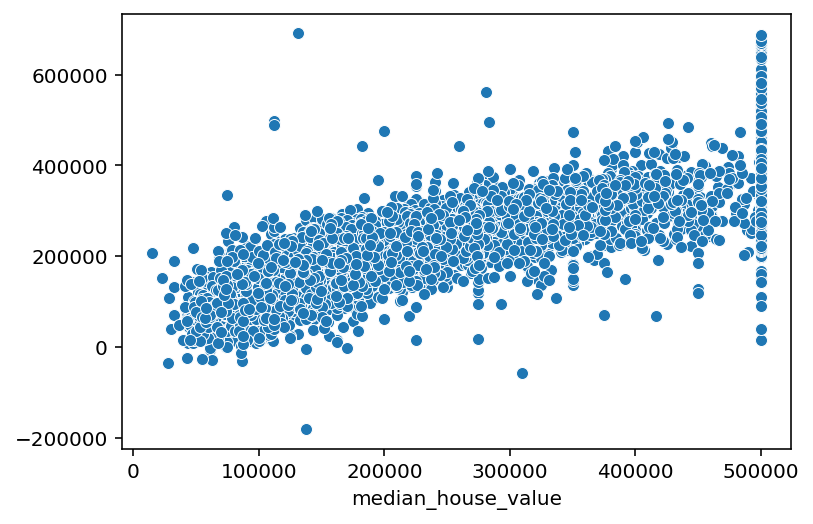

In [23]:
sns.scatterplot(y_test, lr_preds)
plt.show()

### Decision Tree Regressor

In [24]:
dt =DecisionTreeRegressor()
dt.fit(scaled_x_train, y_train)
dt_preds = dt.predict(scaled_x_test)

print('Decision Tree Regressor')
print('Root Mean Squared Error => {mse}'.format(mse=(round(mse(y_test, dt_preds,squared=False),2))))
print('Model Accuracy => {r2}'.format(r2=round(r2_score(y_test,dt_preds)*100, 2)))

Decision Tree Regressor
Root Mean Squared Error => 69473.72
Model Accuracy => 63.8


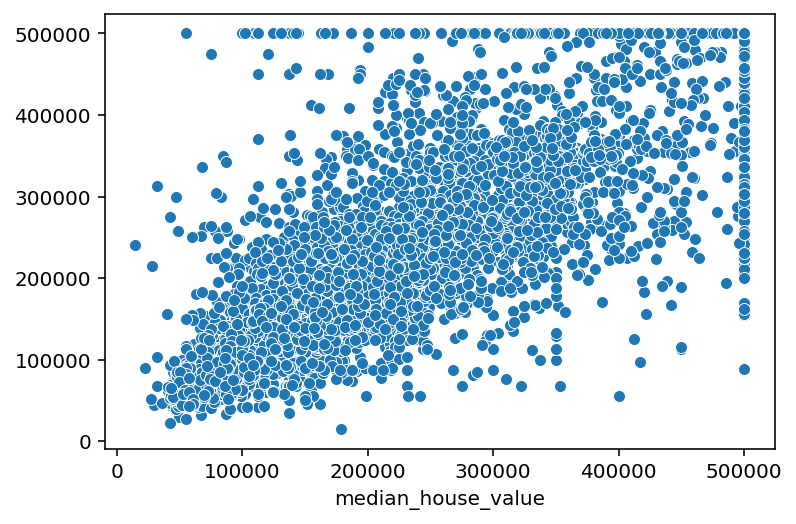

In [25]:
sns.scatterplot(y_test, dt_preds)
plt.show()

### Random Forest Regressor

In [26]:
rf =RandomForestRegressor()
rf.fit(scaled_x_train, y_train)
rf_preds = rf.predict(scaled_x_test)

print('Random Forest Regressor')
print('Root Mean Squared Error => {mse}'.format(mse=(round(mse(y_test, rf_preds,squared=False),2))))
print('Model Accuracy => {r2}'.format(r2=round(r2_score(y_test,rf_preds)*100, 2)))

Random Forest Regressor
Root Mean Squared Error => 49705.39
Model Accuracy => 81.47


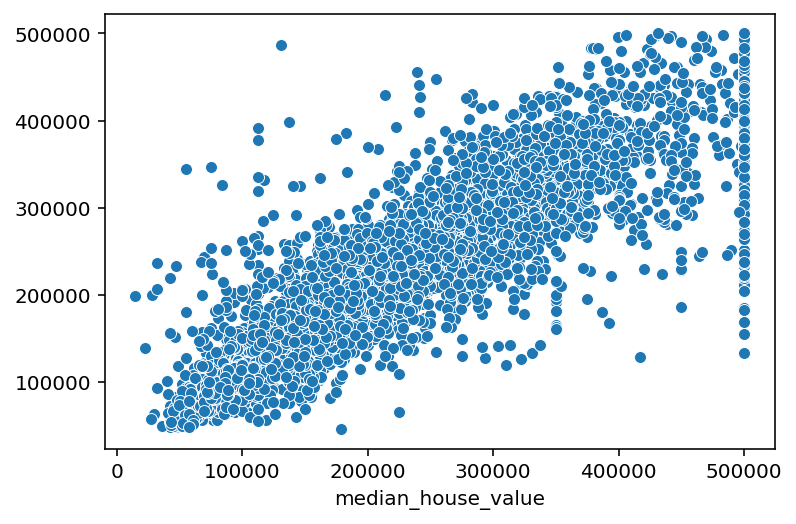

In [27]:
sns.scatterplot(y_test, rf_preds)
plt.show()

Looking at the scatterplots, it is obvious the random forest regressor fit more with the data compared with linear regression and decision tree regressor.

# Using Median Income to predict Median House Value

In [37]:
x2=df[['median_income']]
y2=df.median_house_value

In [38]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.3, random_state=0)

In [39]:
# Random Forest Regressor

lr2 =LinearRegression()
lr2.fit(x2_train, y2_train)

preds2 = lr2.predict(x2_test)

print('Random Forest Regressor')
print('Root Mean Squared Error => {mse}'.format(mse=(round(mse(y2_test, preds2,squared=False),2))))
print('Model Accuracy => {r2}'.format(r2=round(r2_score(y2_test,preds2)*100, 2)))

Random Forest Regressor
Root Mean Squared Error => 85124.54
Model Accuracy => 45.65


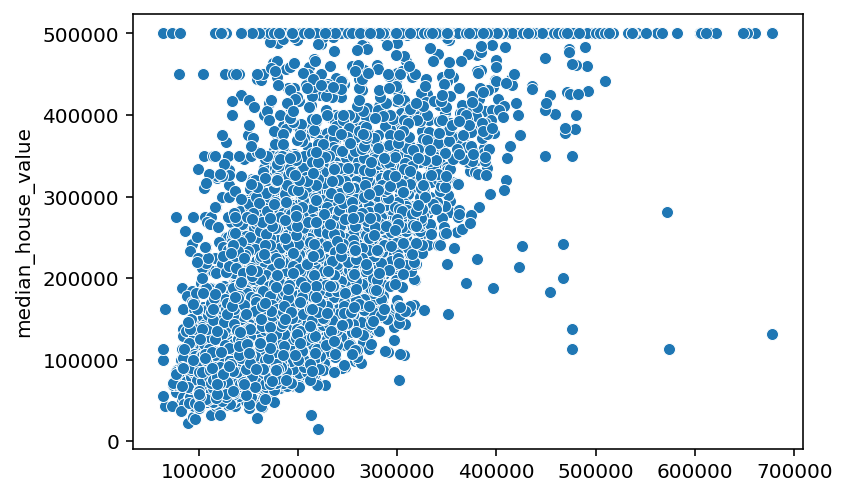

In [40]:
# plot resuls
sns.scatterplot(preds2, y2_test)
plt.show()